# Basic Image Classification using PyTorch

In this lab session, you will build a basic Convolutional Neural Network (CNN) using PyTorch. The CNN will classify images stored in the `Data/training_set` and `Data/test_set` folders. We will follow the steps of data preprocessing, defining a simple CNN, training the model, and evaluating its performance.


## Introduction

PyTorch is one of the most widely used deep learning libraries that you can use to build a CNN. CNNs are particularly effective for image recognition tasks, making them ideal for applications such as facial recognition, self-driving cars, and medical image analysis. In this lab, we will work through the process of building a basic CNN for binary image classification, similar to the popular "Cats vs. Dogs" classification problem.

By the end of this session, you will understand how to:

- Define and initialize a CNN model in PyTorch.
- Apply convolution and pooling operations to extract features from images.
- Use data augmentation to increase the robustness of the model.
- Train the CNN model using the binary cross-entropy loss function and the Adam optimizer.
- Evaluate the model's performance on a test dataset.

## Learning Objectives

By completing this lab, students will be able to:

1. Understand the architecture and components of Convolutional Neural Networks (CNNs).
2. Implement a CNN in PyTorch to classify images.
3. Perform data augmentation techniques to enhance the model's performance and prevent overfitting.
4. Train and evaluate the CNN model using PyTorch's training loop and metrics.
5. Visualize and interpret model accuracy and performance metrics.

This exercise builds a strong foundation in deep learning and prepares students for more advanced topics in neural networks, such as transfer learning and object detection.

## Instructions

Please follow these steps to complete the lab:

1. **Step 1: Data processing**

2. **Step 2: Model definition**

3. **Step 3: Loss and Optimizer**

4. **Step 4: Training the model**

5. **Step 5: Evaluating the model**

6. **Step 6: Testing a classification example**

7. **Step 7: Create a report**

You are asked to write a short (no more than 2 pages) report of your work, completing the tasks and answering the questions. This work is not assessed (it will not count towards your module mark) but you will get formative feedback. Make sure to refer to the comments in the code for guidance. Feel free to experiment with different architectures or hyperparameters (e.g., number of layers, number of filters, learning rate) to see how they affect the performance.


1. **Data Preprocessing**:
   - We define a `transform` to resize images to `64x64` and normalize their pixel values. This step is important for handling images consistently.
   - `datasets.ImageFolder` is used to load images from the `data_set_train` and `data_set_test` directories. Images are organized into subfolders named after the classes they belong to (e.g., `cat` and `dog`).

In [1]:
import skimage
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


Before following the steps 1-6, let's take a look at one of the images

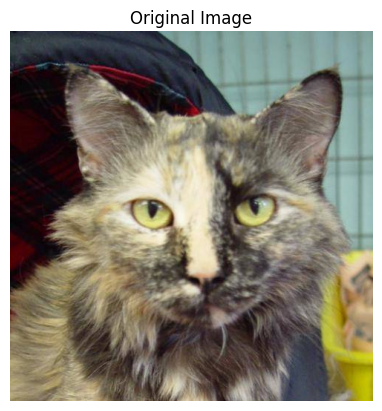

In [2]:
# Read image
cat10 = skimage.io.imread('Data/training_set/cats/cat.10.jpg')

# Display the image
plt.imshow(cat10)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [3]:
# Step 1: Data Preprocessing
# Define transformations for the training and testing datasets
# Transforms include resizing the images to 64x64, converting them to tensors, and normalizing pixel values

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 64x64 pixels
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images (important for deep learning models)
])

# Load the training and testing datasets from the directories
train_set = datasets.ImageFolder(root='Data/training_set', transform=transform)
test_set = datasets.ImageFolder(root='Data/test_set', transform=transform)
print("Transformations generated")

# Create data loaders to load data in batches
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)  # Shuffle to randomize data
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

Transformations generated


2. **Model Definition**:
   - We use `nn.Sequential` to create a basic Convolutional Neural Network (CNN) with two convolutional layers and two fully connected layers.
   - The `Conv2d` layers detect patterns, while the `ReLU` activation introduces non-linearity. `MaxPool2d` reduces the size of feature maps.
   - `Flatten` transforms the 2D feature maps into a 1D vector to be fed into the fully connected layers.
   - The final layer is a `Softmax` layer for multi-class classification

In [4]:
# Step 2: Define the Model
# Create a simple Convolutional Neural Network (CNN) for image classification

model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),  # First conv layer
    nn.ReLU(),  # Activation function
    nn.MaxPool2d(kernel_size=2, stride=2),  # Pooling layer (reduce size)

    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),  # Second conv layer
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Pooling

    nn.Flatten(),  # Flatten the output from the conv layers for the fully connected layer
    nn.Linear(32 * 32 * 32, 64),  # Fully connected layer
    nn.ReLU(),
    nn.Linear(64, 2),  # Output layer (assuming 2 classes in the dataset)
    nn.Softmax(dim=1)  # Softmax for classification
)

print("Model created")

Model created


3. **Loss and Optimizer**:
   - `CrossEntropyLoss` is used because it's well-suited for classification tasks where the output is a probability distribution across multiple classes.
   - `Adam` optimizer adjusts the weights using gradients, with a learning rate of `0.001`.

In [5]:
# Step 3: Define Loss Function and Optimizer
# Use Cross Entropy Loss for classification tasks and Adam optimizer

criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

4. **Training the Model**:
   - The training loop runs for a specified number of epochs, where each image in the dataset is passed through the model to compute loss, and the optimizer updates the weights.
   - We print the loss at the end of each epoch to monitor training progress.

In [6]:
import time

# Step 4: Train the Model
num_epochs = 5  # Number of times to go through the dataset
print("Starting training... ")
start_time = time.time()
for epoch in range(num_epochs):
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass: compute the output
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass: compute the gradients
        loss.backward()

        # Update weights
        optimizer.step()

        # Add loss to the running total
        running_loss += loss.item()

    # Print the average loss for this epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

end_time = time.time()
print('...Training completed!')
print("Training time:", end_time - start_time, "seconds")


Starting training... 
Epoch [1/5], Loss: 0.6301
Epoch [2/5], Loss: 0.5757
Epoch [3/5], Loss: 0.5309
Epoch [4/5], Loss: 0.4908
Epoch [5/5], Loss: 0.4537
...Training completed!
Training time: 710.2958898544312 seconds


5. **Evaluating the Model**:
   - During evaluation, the model predicts the class of each image in the test set, and the accuracy is calculated by comparing predictions to the ground truth labels.

In [7]:
# Step 5: Evaluate the Model
# Set the model in evaluation mode
model.eval()

correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in test_loader:
        # Forward pass: compute the output
        outputs = model(inputs)

        # Get the predicted class (the class with the highest score)
        _, predicted = torch.max(outputs, 1)

        # Update the total number of images and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print the final accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 74.89%


5. **Evaluating the Model**:
   - Using the trained classifier on a single image from the test set to predict its label. This includes passing the image through the model and obtaining the predicted label.

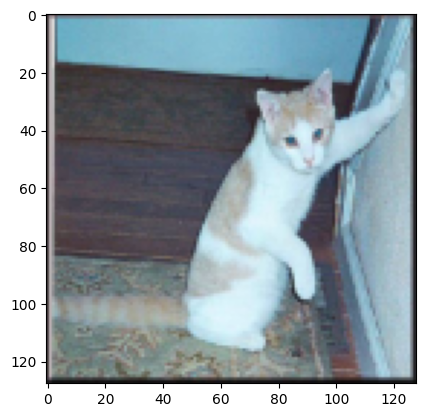

Predicted label: cats
Actual label: cats


In [8]:
# Step 6: Use the Classifier on a Single Image

import numpy as np

# Function to show an image
def my_imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show the first image in the batch
my_imshow(images[0])

# Pass the first image through the model to get the predicted label
model.eval()  # Make sure model is in evaluation mode
with torch.no_grad():  # Disable gradient calculation
    outputs = model(images[0].unsqueeze(0))  # Add a batch dimension (unsqueeze)
    _, predicted = torch.max(outputs, 1)  # Get the index of the highest score (prediction)

# Get the class names from the dataset
class_names = test_set.classes  # Class names are taken from the folder names

# Print the predicted label and the actual label
print(f'Predicted label: {class_names[predicted.item()]}')
print(f'Actual label: {class_names[labels[0].item()]}')


## Task1
### Modify image sizes

Currently, the images are resized to 64x64 pixels before being fed into the model. Modify the code to resize the images to 128x128 pixels instead, and observe how this affects the model's performance.
Question: What effect does increasing the image size have on the training time and accuracy? Why might this happen?

In [9]:
# Complete Task 1 here

## Task 2
### Change the Number of Convolutional Filters

In the current model, the first convolutional layer has 16 filters, and the second convolutional layer has 32 filters. Change the number of filters to 32 and 64, respectively.
Question: How does changing the number of filters affect the model's accuracy? What might be the reason for this change?

In [10]:
# Complete Task 2 here

## Task 3
### Add a Dropout Layer
Overfitting can be an issue in deep learning models. Add a `Dropout` layer between the fully connected layers with a dropout probability of 0.5 to reduce overfitting. Re-train the model and evaluate its performance.
Question: How does adding a dropout layer affect the model's training and test accuracy? Explain why dropout can help prevent overfitting.

In [11]:
# Complete Task 3 here

## Task 4. 
### Add a third convolutional layer
Add a third convolutional layer to the model with 128 filters, observe how this affects the model’s performance and training time, and describe what you found. Use a similar structure as the previous layers with a `Conv2d` layer, `ReLU`, and `MaxPool2d`.

In [12]:
# Complete Task 4 here